In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from nonLinCorr import *

In [2]:
def flatten_and_mask_shots(shots, mask,):
    num_shots = shots.shape[0]
    size = shots.shape[1]*shots.shape[2]
    flat_mask = mask.reshape(size)
    flat_shots =  shots.reshape( (num_shots,size))*flat_mask
    
    return flat_shots[:,flat_mask]

def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))

In [3]:
run = 115
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/\
flatfield_calibration/ave_int_statisitcs/run%d_ave_int.h5'%run,'r')
# f.keys()

f_mask = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/masks/run%d_masks.h5'%run,'r')
mask=f_mask['mask'].value

flat_ave_shots = f['ave_flat_shots'].value
num_shots = f['num_shots_per_bin'].value

# thresholding
select=num_shots>10
flat_ave_shots = flat_ave_shots[select]
flat_std_shots = f['ave_flat_shots_err'].value[select]

ave_bin_int = flat_ave_shots.mean(-1)
print flat_ave_shots.shape,ave_bin_int.shape

(38, 2082302) (38,)


In [5]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/flat_det_imgs/fullImgs_run%d.h5'%run,'r')
f.keys()
single_shots=f['flat_img'][:10]
single_shots_ints = single_shots.mean(-1)

In [6]:
ref_ind = 10
corrFunc,cn = getCorrectionFunc(dmat=flat_ave_shots.copy(),i = ave_bin_int.copy(),
                             ic = ave_bin_int[ref_ind], order=10)
sn_corrected = corrFunc(single_shots,single_shots_ints)
sn_corrected.shape

cali_curves = cn(ave_bin_int)

In [ ]:

bins= np.linspace(-100,100,100)
hist=np.histogram(single_shots[idx], bins=bins)
plt.step(hist[1][1:],hist[0])
hist=np.histogram(sn_corrected[idx], bins=bins)
plt.step(hist[1][1:],hist[0])

13.5488496701
23.026


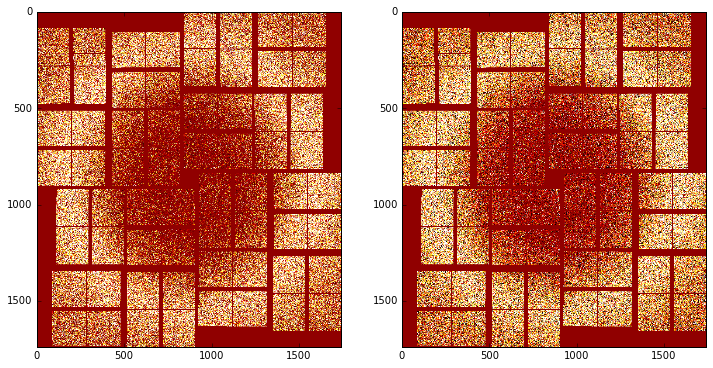

In [18]:
# img = unflatten_shots(flat_ave_shots[1:2,:],mask)[0]
plt.figure(figsize=[12,6])
idx=2
img = unflatten_shots(single_shots[idx][None,:],mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=-10,vmax = 40,cmap='hot')

img = unflatten_shots(sn_corrected[idx][None,:],mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=-10,vmax = 40,cmap='hot')

print ave_bin_int[ref_ind]
print single_shots_ints[idx]
# plt.colorbar()

In [128]:
ref_shot = flat_ave_shots[ref_ind]
ref_shot= ref_shot/ref_shot.mean()

test_ind = 28
test_shot = flat_ave_shots[test_ind]
test_shot/=test_shot.mean()

diff = test_shot/(ref_shot) -1. 
cali_diff = cali_curves[test_ind].copy()
cali_diff/=cali_diff.mean()
cali_diff = cali_diff/(ref_shot)-1.

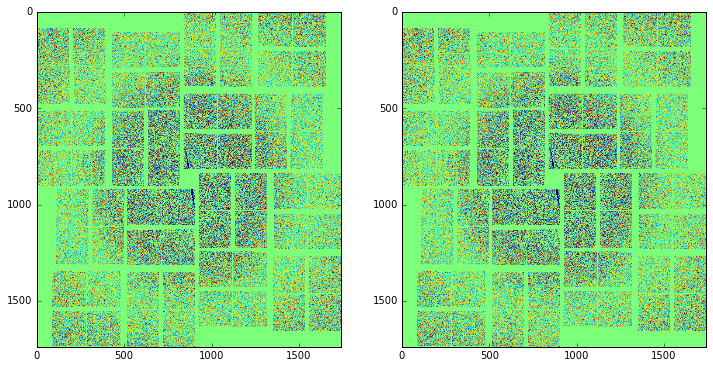

In [129]:
# img = unflatten_shots(flat_ave_shots[1:2,:],mask)[0]
plt.figure(figsize=[12,6])
img = unflatten_shots(diff[None,:],mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=-0.5,vmax = .5)

img = unflatten_shots(cali_diff[None,:],mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=-.5,vmax = .5)

# plt.colorbar()

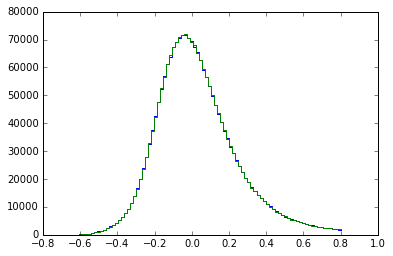

In [130]:
bins= np.linspace(-0.8,.8,100)
hist=np.histogram(diff, bins=bins)
plt.step(hist[1][1:],hist[0])
hist=np.histogram(cali_diff, bins=bins)
plt.step(hist[1][1:],hist[0])

In [131]:

cali_diff2 = sn_corrected[test_ind]
cali_diff2/=cali_diff2.mean()
sc=cn(ave_bin_int[ref_ind])[0]
sc/=sc.mean()
cali_diff2 = cali_diff2/(sc) -1

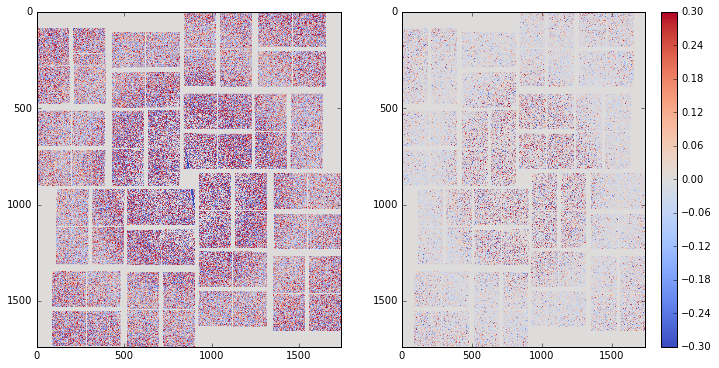

In [136]:
plt.figure(figsize=[12,6])
img = unflatten_shots(diff[None,:],mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=-.3,vmax = .3, cmap='coolwarm')

img = unflatten_shots(cali_diff2[None,:],mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=-.3,vmax = .3, cmap='coolwarm')
plt.colorbar()

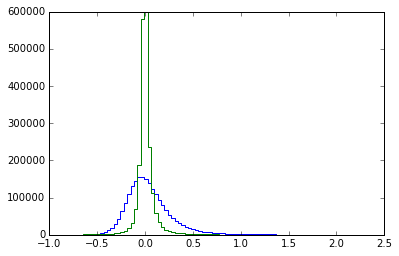

In [133]:
bins= np.linspace(-1,2.5,100)
hist=np.histogram(diff, bins=bins)
plt.step(hist[1][1:],hist[0])
hist=np.histogram(cali_diff2, bins=bins)
plt.step(hist[1][1:],hist[0])

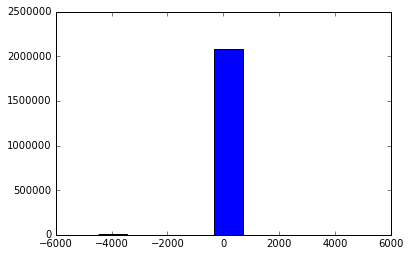

In [134]:
# _=plt.hist(ref_shot,100)
# _=plt.hist(sc,100, alpha=0.5)
_=plt.hist(sn_corrected[test_ind]/(sn_corrected[test_ind].mean()))
# _=plt.hist(flat_ave_shots[ref_ind],100)
# _=plt.hist(test_shot,100, alpha=0.5)

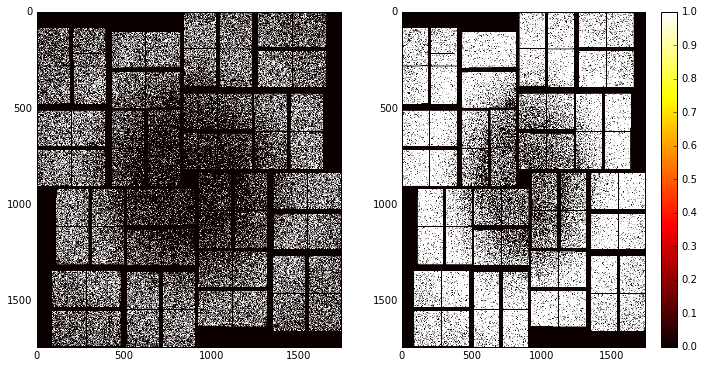

In [135]:
plt.figure(figsize=[12,6])
img = unflatten_shots(np.abs(diff[None,:])<0.1,mask)[0]
plt.subplot(121)
plt.imshow( img, aspect='auto',
         vmin=0,vmax = 1, cmap='hot')

img = unflatten_shots(np.abs(cali_diff2[None,:])<0.1,mask)[0]

plt.subplot(122)
plt.imshow( img, aspect='auto',
         vmin=0,vmax = 1, cmap='hot')
plt.colorbar()